In [50]:
# ## Лабораторная работа 3_3_1
# Метрики классификации для модели логистической регрессии (Titanic)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, precision_recall_curve,
                            roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)

# Загрузка и предобработка данных
titanic = pd.read_csv('Titanic.csv')
titanic = titanic.dropna()
titanic = titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Разделение данных
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

Accuracy: 0.6909
Precision: 0.7812
Recall: 0.7143
F1-score: 0.7463


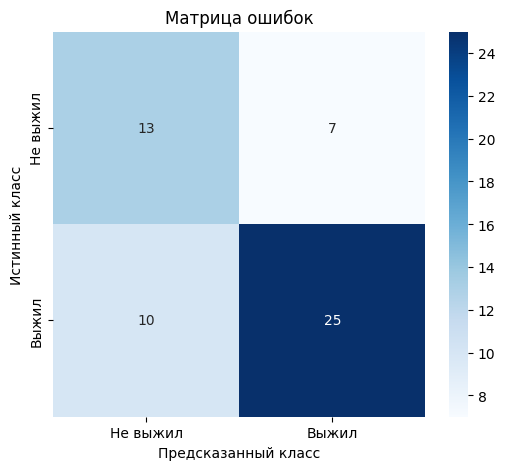

In [51]:
# Основные метрики классификации

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод метрик
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не выжил', 'Выжил'],
            yticklabels=['Не выжил', 'Выжил'])
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

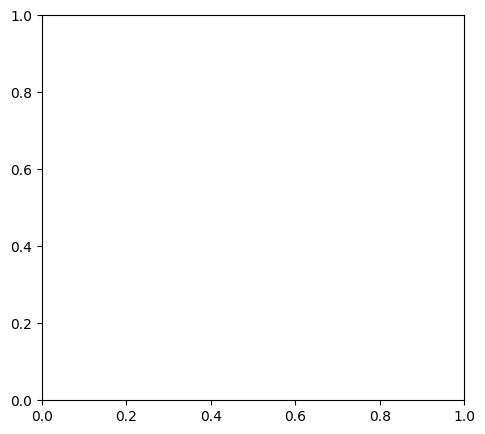

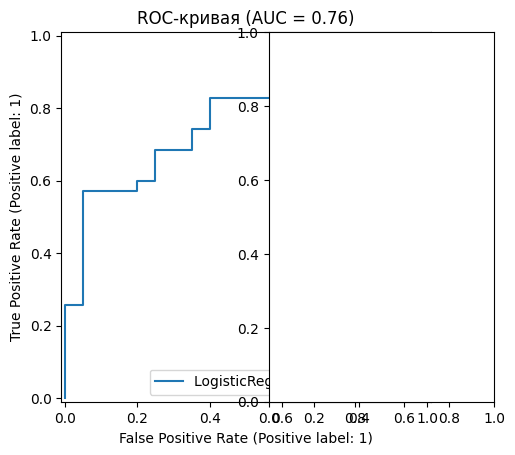

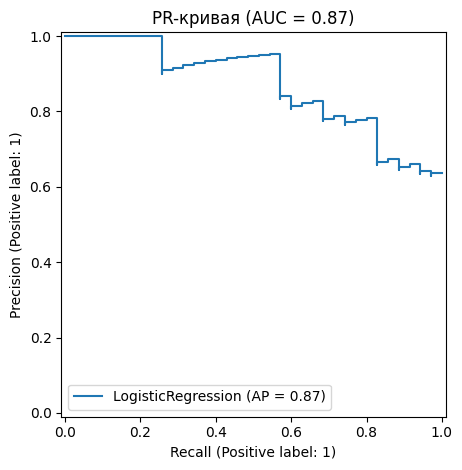

In [52]:
# Кривые ROC и PR

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('ROC-кривая (AUC = {:.2f})'.format(roc_auc))

# PR-кривая
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall_vals, precision_vals)

plt.subplot(1, 2, 2)
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)
plt.title('PR-кривая (AUC = {:.2f})'.format(pr_auc))
plt.tight_layout()
plt.show()

In [53]:
# Вывод о качестве модели
print("\nВывод о качестве модели:")
print("1. Accuracy {:.2f}% показывает общую долю правильных предсказаний.".format(accuracy*100))
print("2. Precision {:.2f}% означает, что из всех предсказанных выживших, {:.2f}% действительно выжили.".format(precision*100, precision*100))
print("3. Recall {:.2f}% показывает, что модель правильно идентифицировала {:.2f}% всех реально выживших.".format(recall*100, recall*100))
print("4. F1-score {:.2f} - среднее гармоническое precision и recall.".format(f1))
print("5. AUC-ROC {:.2f} показывает хорошее качество разделения классов.".format(roc_auc))
print("6. AUC-PR {:.2f} свидетельствует о балансе между precision и recall.".format(pr_auc))


Вывод о качестве модели:
1. Accuracy 69.09% показывает общую долю правильных предсказаний.
2. Precision 78.12% означает, что из всех предсказанных выживших, 78.12% действительно выжили.
3. Recall 71.43% показывает, что модель правильно идентифицировала 71.43% всех реально выживших.
4. F1-score 0.75 - среднее гармоническое precision и recall.
5. AUC-ROC 0.76 показывает хорошее качество разделения классов.
6. AUC-PR 0.87 свидетельствует о балансе между precision и recall.
